# Exercise 3.2 Mesh plots (cartopy)
prepared by M.Hauser

Here we learn how to plot data as mesh grid. This is important for *gridded* model data or observations (we will introduce the interpolating function `contour` and `contourf` later). There are three functions to plot three-dimensional data in two dimensions using a colored mesh in matplotlib:

 * pcolormesh
 * pcolor
 * imshow



We will show the usage of `pcolormesh` in this exercise. This function is recommended over the others because:

 * "imshow assumes that all data elements in your array are to be rendered at the same size, whereas pcolormesh/pcolor associates elements of the data array with rectangular elements whose size may vary over the rectangular grid" (shamelessly stolen from this [stackoverflow answer](https://stackoverflow.com/a/21169703)).
 * `pcolormesh` is [about 1 to 3 orders of magnitude faster](http://thomas-cokelaer.info/blog/wp-content/uploads/2014/05/pcolor_erformance.png) than `pcolor`.

Note that most of what we show here for georeferenced plots also applies for normal `pcolormesh`.

## Import libraries

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
import mplotutils as mpu

## Data

We use artificial [sample data](http://scitools.org.uk/cartopy/docs/v0.15/examples/axes_grid_basic.html) to illustrate the plotting.

## First pcolormesh plot

`pcolormesh` takes x, y, z as input:

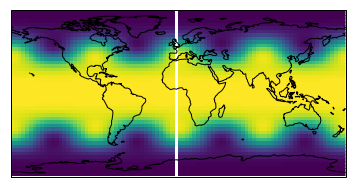

In [3]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.pcolormesh(lon, lat, data)

ax.set_global()

## Load CMIP 5 data: historical precipitation climatology (1986 to 2005)

We will load a netCDF with historical, and projected climatlological precipitation, as well as the relative change between them, from all CMIP5 models for RCP8.5 (Taylor et al., 2012).

The data was prepared in [another notebook](../data/prepare_CMIP5_map.ipynb).

In [5]:
fN = '../data/cmip5_delta_pr_rcp85_map.nc'

# load data, omitting some unecessary variables
pr = xr.open_dataset(fN, drop_variables=['pr_rel', 'proj', 'agree_sign', 'pval'])

pr

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 ...
Data variables:
    hist     (lat, lon) float64 ...
Attributes:
    data:                CMIP5 precipitation (pr)
    time_periods:        hist: 1986-2005; proj: 2081-2100
    pr_delta:            (proj - hist) / hist * 100
    source:              https://data.iac.ethz.ch/atmos/
    reference:           Taylor et al., 2012
    scenario:            rcp8.5
    interpolation_grid:  2.5 x 2.5 degrees bilinear interpolation

### Exercise
 * plot the climatological precipitation amount (`pr.hist`)

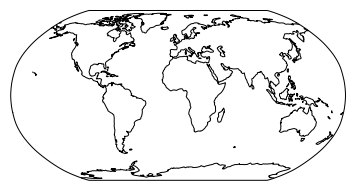

In [6]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist
# ====

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# code here

ax.set_global()

### Solution

In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist
# ====

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

ax.pcolormesh(lon, lat, hist, transform=ccrs.PlateCarree())

ax.set_global()

This looks all right, but what's with the white stripe?

Commonly lat and lon are in the center of the gridcell. However, `pcolormesh` assumes that the coordinates specify the *edges* of the gridcells and *silently truncates the topmost row and the rightmost column* in the plot!

This becomes more obvious if we have less datapoints. 

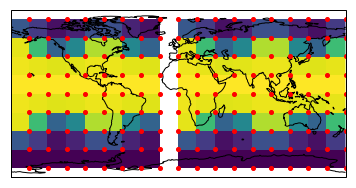

In [7]:
# create sample data
lon, lat, data = mpu.sample_data_map(nlons=18, nlats=9)

# this is never displayed!
data[:, -1] = 5

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

h = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())

# plot the lat and lon data

lons, lats = np.meshgrid(lon, lat)
ax.plot(lons.flatten(), lats.flatten(), 'o', transform=ccrs.PlateCarree(), ms=4, c='r')

ax.set_global()

The red points show the original lat and lon coordinates - they should be in the center of the gridcells.

Notice how there are only 8 rows and 17 columns displayed! This can be remedied by passing the edges instead of the centers of the gridcells:

In [8]:
print(lat)

[-80. -60. -40. -20.   0.  20.  40.  60.  80.]


`lat` goes from -80 to 80 in steps of 20. But we want it to go from -90 to 90 in steps of 20. Therefore we create `LAT` manually:

``` ipython
LAT = np.arange(-90, 91, 20)

```

We need to use 9*1* (instead of 90) because else `LAT` would only go to 70 (that's a python convention).

(10,) (9,)
(19,) (18,)
(9, 18)


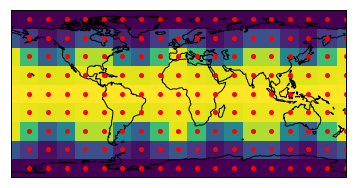

In [9]:
# create sample data
lon, lat, data = mpu.sample_data_map(18, 9)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON = np.arange(-10, 351, 20)
LAT = np.arange(-90, 91, 20)


h = ax.pcolormesh(LON, LAT, data, transform=ccrs.PlateCarree())

# plot the lat and lon data

lons, lats = np.meshgrid(lon, lat)
ax.plot(lons.flatten(), lats.flatten(), 'o', transform=ccrs.PlateCarree(), ms=4, c='r')

ax.set_global()


# ====

print(LAT.shape, lat.shape)
print(LON.shape, lon.shape)
print(data.shape)


Perfect. Notice how LAT has one more element than lat and data! Also for lon.

### Exercise

 * apply the same correction for the cmip5 precipitation data

In [10]:
print(pr.lon.values[:5])
print('Delta lon:', np.unique(np.diff(pr.lon.values)))

print()
print(pr.lat.values[:5])
print('Delta lat:', np.unique(np.diff(pr.lat.values)))

[ 1.25  3.75  6.25  8.75 11.25]
Delta lon: [2.5]

[-88.75 -86.25 -83.75 -81.25 -78.75]
Delta lat: [2.5]


In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# create coordinates of edges

# LON = 
# LAT = 

ax.pcolormesh(lon, lat, hist, transform=ccrs.PlateCarree())

ax.set_global()

### Solution

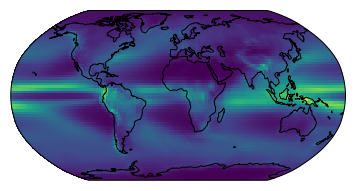

In [11]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# create coordinates of edges

LON = np.arange(0, 361, 2.5)
LAT = np.arange(-90, 91, 2.5)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree())

ax.set_global()

Of course, calculating the edges can be done in a function, which I provide in the `mplotutils` (`mpu`) package.

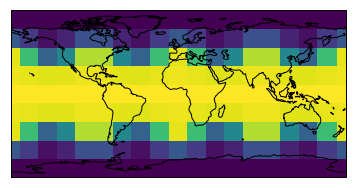

In [12]:
# create sample data
lon, lat, data = mpu.sample_data_map(18, 9)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

h = ax.pcolormesh(LON, LAT, data, transform=ccrs.PlateCarree())

ax.set_global()

### Exercise

 * use `mpu.infer_interval_breaks` for the cmip5 precipitation data

In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# replace here
LON = np.arange(0, 361, 2.5)
LAT = np.arange(-90, 91, 2.5)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree())

ax.set_global()

### Solution

In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree())

ax.set_global()

## lat extends from -90...90

Some models/ dataset have lat values that extend from -90..90... For example output from CESM (Community Earth System Model) or HadGEM (Hadley Centre Global Environment Model).

It still makes sense to infer the interval breaks because else:

 * we would loose one row of data
 * the lat coordinates may still be the center of the gridcell, except for the two poles (this is e.g. the case for CESM)

### Open random temperature field from CESM

In [13]:
fN = '../data/cesm_temp.nc'

cesm = xr.open_dataset(fN)

cesm.lat

<xarray.DataArray 'lat' (lat: 96)>
array([-90.      , -88.105263, -86.210526, -84.315789, -82.421053, -80.526316,
       -78.631579, -76.736842, -74.842105, -72.947368, -71.052632, -69.157895,
       -67.263158, -65.368421, -63.473684, -61.578947, -59.684211, -57.789474,
       -55.894737, -54.      , -52.105263, -50.210526, -48.315789, -46.421053,
       -44.526316, -42.631579, -40.736842, -38.842105, -36.947368, -35.052632,
       -33.157895, -31.263158, -29.368421, -27.473684, -25.578947, -23.684211,
       -21.789474, -19.894737, -18.      , -16.105263, -14.210526, -12.315789,
       -10.421053,  -8.526316,  -6.631579,  -4.736842,  -2.842105,  -0.947368,
         0.947368,   2.842105,   4.736842,   6.631579,   8.526316,  10.421053,
        12.315789,  14.210526,  16.105263,  18.      ,  19.894737,  21.789474,
        23.684211,  25.578947,  27.473684,  29.368421,  31.263158,  33.157895,
        35.052632,  36.947368,  38.842105,  40.736842,  42.631579,  44.526316,
        46.421053

The problem of the white line exists:

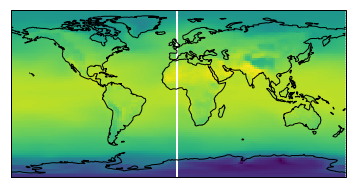

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

ax.pcolormesh(cesm.lon, cesm.lat, cesm.temp, transform=ccrs.PlateCarree())

ax.set_global()

And can be corrected with `infer_interval_breaks`:

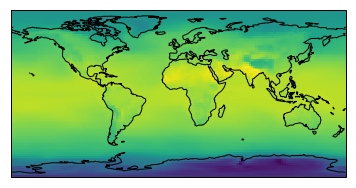

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat)
ax.pcolormesh(LON, LAT, cesm.temp, transform=ccrs.PlateCarree())

ax.set_global()

This creates a warning (because lat is now outside of the allowd range). We can correct this by `clipping` the values to the range -90...90.

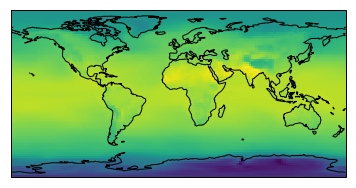

In [16]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat, clip=True)

h = ax.pcolormesh(LON, LAT, cesm.temp - 273.15, transform=ccrs.PlateCarree())

ax.set_global()

## Saving figures // rasterized

There is nothing special about saving a map figure:

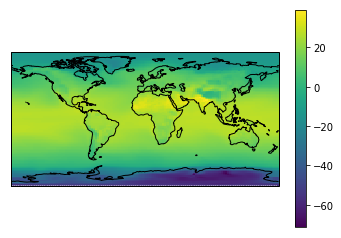

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat, clip=True)

h = ax.pcolormesh(LON, LAT, cesm.temp - 273.15, transform=ccrs.PlateCarree())

ax.set_global()

plt.colorbar(h)

plt.savefig('cesm_temp.pdf')

However, they can grow large very quickly. Especially if you save a `pcolormesh` figure as pdf, because the pdf is saved as vector graphic.

It is, however, possible to rasterize certain elements of the plot, e.g. the `pcolormesh`.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat, clip=True)

h = ax.pcolormesh(LON, LAT, cesm.temp - 273.15, transform=ccrs.PlateCarree(), rasterized=True)

ax.set_global()

plt.colorbar(h)

plt.savefig('cesm_temp_rasterized.pdf')

* Compare the file size of `'cesm_temp_rasterized.pdf'` and `'cesm_temp.pdf'`.

> Warning: the following line may not work in windows.

In [ ]:
! ls -lh cesm_temp*

* Open cesm_temp_rasterized.pdf and zoom in; you'll realise that the coastlines are not rasterized!

Let's look at a detail of the precipitation data:

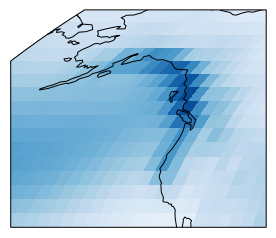

In [18]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
LON, LAT = mpu.infer_interval_breaks(lon, lat)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), cmap='Blues', vmax=2500)

ax.set_extent([-150, -130, 30, 70], ccrs.PlateCarree())

plt.savefig('cmip5_precip.pdf')

### Exercise

 * save the same plot again, but rasterize the `pcolormesh`

In [ ]:
# code here

plt.savefig('cmip5_precip_rasterized.pdf')

### Solution

In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
LON, LAT = mpu.infer_interval_breaks(lon, lat)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), cmap='Blues', vmax=2500, rasterized=True)

ax.set_extent([-150, -130, 30, 70], ccrs.PlateCarree())

plt.savefig('cmip5_precip_rasterized.pdf')

## dpi

The resulting pdf does not look very good - because the rectangular elements don't have vertical edged (but the pixels do). However, savefig takes a `dpi` keyword, which saves the day.

In [ ]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
LON, LAT = mpu.infer_interval_breaks(lon, lat)

ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), cmap='Blues', vmax=2500, rasterized=True)

ax.set_extent([-150, -130, 30, 70], ccrs.PlateCarree())

plt.savefig('cmip5_precip_rasterized_dpi.pdf', dpi=400)

 * Compare the size of `'cmip5_precip.pdf'`, `'cmip5_precip_rasterized.pdf'`, and `'cmip5_precip_rasterized_dpi.pdf'`.

> Warning: the following line may not work in windows.

In [ ]:
! ls -lh cmip5_precip*

 * Open the three pdfs and compare their quality.

## Color range

We can set the range of the colors with `vmin` and `vmax`. Because we now clip values at both ends, we should let the viewers know. We can do this by usign the `extend` keyword in the colorbar. It takes the  values

 * `'neither'` (default).
 * `'both'`
 * `'min'`
 * `'max'`

Let's restrict the temperature range to -30..30, and also change the colormap, using `extend='both'`.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat, clip=True)

h = ax.pcolormesh(LON, LAT, cesm.temp - 273.15, transform=ccrs.PlateCarree(), vmin=-30, vmax=30,
                  cmap='RdBu_r')

ax.set_global()

plt.colorbar(h, extend='both')

### Exercise
 * clip the precipitation values to the range 0...3000
 * indicate that the values extend at the upper bound

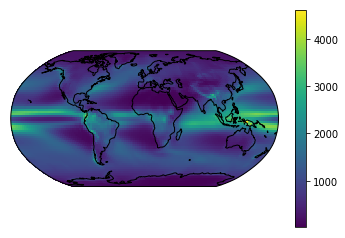

In [19]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

h = ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree())

ax.set_global()

plt.colorbar(h)

### Solution

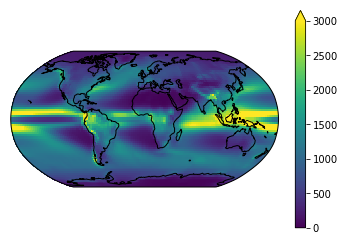

In [20]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

h = ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), vmin=0, vmax=3000)

ax.set_global()

plt.colorbar(h, extend='max')

## Color levels

To create discrete color scale instead of a continuous, we need to pass `norm` to `pcolormesh`. `norm` is a fuction that normalize data into the 0.0...1.0 interval. Usually it ranges linearly between the minimum and maximum data values. We also need to pass a changed colormap (`cmap`).

For this we can make use of a small helper function in `mpu`.

> doing this, we don't need to specify `extend` in the colorbar any more.

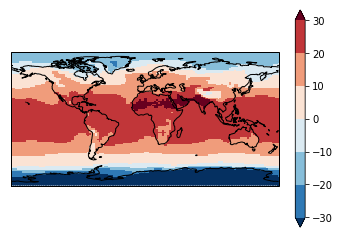

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

levels = np.arange(-30, 31, 10)
cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')

LON, LAT = mpu.infer_interval_breaks(cesm.lon, cesm.lat, clip=True)

h = ax.pcolormesh(LON, LAT, cesm.temp - 273.15, transform=ccrs.PlateCarree(), norm=norm, cmap=cmap)

ax.set_global()

plt.colorbar(h)

### Exercise

 * create discrete levels for the precipitation data
 * the colormap is called `'viridis'`

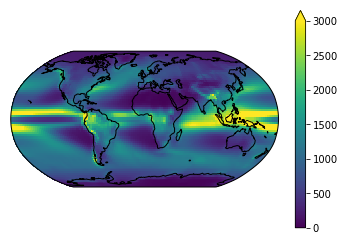

In [22]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

h = ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), vmin=0, vmax=3000)

ax.set_global()

plt.colorbar(h, extend='max')

### Solution

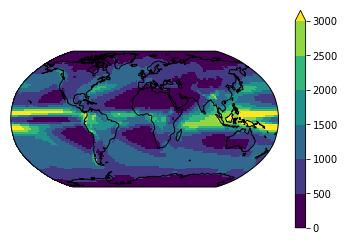

In [23]:
# get data
lon, lat, hist = pr.lon, pr.lat, pr.hist

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

LON, LAT = mpu.infer_interval_breaks(lon, lat)

levels = np.arange(0, 3001, 500)
cmap, norm = mpu.from_levels_and_cmap(levels, 'viridis', extend='max')

h = ax.pcolormesh(LON, LAT, hist, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

ax.set_global()

plt.colorbar(h, extend='max')

## Bonus: xarray

Until now we used xarray only as 'data store' and did the plotting as

    ax.plot(ds.lon, ds.lat. ds.data, ...)
    
However, `xarray` also has it's dedicated plotting functions, which allow to do:
    
    ds.data.plot.pcolormesh(ax=ax, ...)

> This plotting function already applies the `interval_breaks`.

> It also directly takes a `levels` keyword, and applies the correct normalisation and selection of the colorbar.

Note that `xarray` does some additional things under the hood, and cannot apply the clipping of the values (note the warning).


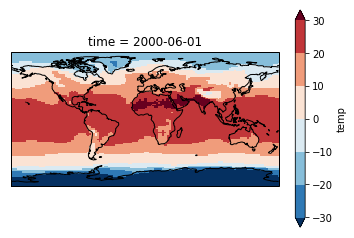

In [24]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

temp = cesm.temp - 273.15

levels = np.arange(-30, 31, 10)
temp.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), levels=levels)

ax.set_global()

### Exercise

 * plot the cmip5 precipitation data with xarray
 * specify levels

In [ ]:
# code here

### Solution

In [ ]:
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

levels = np.arange(0, 3001, 500)
pr.hist.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), levels=levels)

ax.set_global()

### Note on the colormap

xarray includes some logic to select a colormap - if the data crosses 0 it chooses `'RdBu_r'`, else `'viridis'`, but of course you can always set it manually, with the `cmap` argument.